# Methodology:

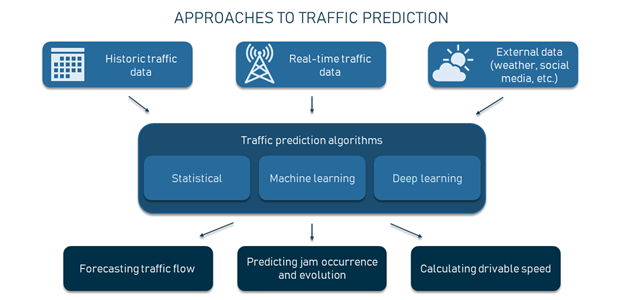

## Algorithms for generating traffic predictions (MODELS):

Traffic prediction involves forecasting drivable speed on particular road segments, as well as jam occurrence and evolution. Let's take a look at different approaches to this task.

**Statistical approach:**  
Using statistical techniques, we can recognize traffic patterns at various scales, such as during the day, on various days of the week, seasonally, etc.  Compared to machine learning methods, they are typically quicker, cheaper, and easier to execute. However, because they can't handle as much multivariate data, they are less accurate.  
Since the 1970s, auto-regressive integrated moving average (ARIMA) models—which are simple to use and show higher accuracy than other statistical techniques—have been extensively employed to predict traffic.  
It uses a traditional statistical methodology to analyze the past and forecast the future. It gathers data from a series of regular time intervals and makes the assumption that historical patterns will continue in the future. However, traffic flow is a complex structure with many variables that can't be effectively processed with the help of the univariate ARIMA models.  

**Machine learning approach:**  
We can build predictive models using machine learning (ML) that take into account the massive amounts of heterogeneous data from many sources. The use of ML algorithms to forecast traffic has been the subject of numerous studies. Here are a few effective examples.  
The random forest method builds several decision trees and combines their data to produce precise forecasts. Given enough training data, it can generate effective results quickly. In this instance, the model's input variables include the weather, time, specific road conditions, road quality, and holidays.  
Furthermore, the k-nearest neighbors (KNN) method uses the idea of feature similarity to forecast future values.  

**Deep learning approach:**  
Deep learning (DL) methods have proved highly effective in predicting road traffic in comparison to ML or statistical techniques, consistently showing about 90 percent forecasting accuracy and higher. DL algorithms are based on neural networks.  
Artificial neural networks (ANN) or neural networks (NN) are made up of interconnected nodes (neurons) organized in two or more layers and are intended to mimic the behavior of the human brain. There are many types of neural networks developed for different purposes. Here are some that were used in traffic analysis and prediction.  

Convolutional neural networks (CNNs) are regarded as industry pioneers in image analysis and recognition. Congestion detection utilizing images from on-road surveillance cameras is one of its natural applications to transportation issues. CNN's are not the first choice for traffic forecasts. 
However, attempts to develop CNN-based models for predicting transportation network speed were highly effective. To do this, researchers created a 2-dimensional picture matrix from time and space data characterizing traffic flow.  

Recurrent neural networks (RNNs), as compared to convolutional neural networks (CNNs), are designed to analyse time-series data or observations gathered over specific time intervals. Such insights can be seen well in traffic patterns. RNN models have been shown to anticipate congestion evolution with excellent accuracy. The vanishing gradient problem, which is why RNNs are considered to "have a short-term memory", is its disadvantage because it causes some of the data from earlier layers to be lost. Model training is more difficult and time-consuming as a result of this "forgetfulness".  

Long short-term memory (LSTM) and gated recurrent unit (GRU) are variations of the RNN that address the vanishing gradient problem. A study that compared the performance of these models showed that the GRU model is more accurate in traffic flow predictions and is easier to train.  

Numerous studies have recommended developing different NN models for traffic prediction, including graph neural networks, fuzzy NNs, Bayesian NNs, and others, as well as utilizing hybrid techniques that integrate two or more algorithms. As of right now, there isn't a single ideal technique that can be used in all situations to produce the most precise projections.  
There are a couple more things to mention in regards to implementing ML techniques for traffic prediction. We have to remember that ML/DL algorithms work best when there is sufficient data to train the models and fine-tune them to achieve maximum accuracy. So, the bigger datasets we manage to obtain the better results we will get.

## Comparing the performance of our model with other novel algorithms

**LSTM:**  
Short-term traffic flow prediction is critical for intelligent transportation systems, and additional spatial and temporal traffic information might be used in future studies to accurately estimate traffic on a larger scale road network.
In general, the more layers the LSTM has, the better the model's learning capacity, but it is also more susceptible to overfitting.

**CNN:**   
CNN, or convolutional neural network, adds extra "filtering" layers where the filter weights are determined. Back propagation is still performing this task for us, but we will not make it too easy for the dependable engine that is backprop.  
A CNN has numerous parallel filters that may be adjusted to extract various aspects of interest.

**CNN VS LSTM:**   
CNN may be used to minimize the number of parameters required for training while maintaining performance – this is the power of combining signal processing with deep learning, while LSTM requires more parameters than CNN, its benefit derives from being able to examine at lengthy sequences of inputs without expanding the network size.

**LSTM RNN:** 

Traditional RNN architecture has the so called vanishing gradient problem. To overcome such disadvantage, certain structure of RNNs such as LSTM were proposed, which was designed to give the memory cells ability to determine when to forget certain information, thus determining the optimal time lags for time series problems. These features are particularly desirable for short-term traffic flow prediction in the transportation domain because of its long-standing memory ability .Using LSTM RNN for traffic flow prediction and showes that LSTM RNN have better performance than most of the non parametric models.

## Data set:

**The Metro Interstate dataset:**  
The Interstate Traffic Volume Dataset contains information about the hourly traffic volume on the West-bound lane of Interstate-94 (I-94) in the US. The dataset includes hourly weather and temperature reports from 2012 to 2018.

The information in the dataset can be used to understand the flow of traffic on the interstate with respect to time and date and can be helpful in prediction of rush hours, weather forecasting as well as planning expansions of interstates and highways in the US.

Furthermore, Hourly weather features and holidays are also included for impacts on traffic volume. 

## Deep learning approach (LSTM and RNN):

The goal in this project is to build multi-step RNN with LSTM model that makes a prediction of the traffic volume 2h into the future, given 6h of history in this data set.

### Importing important libraries

In [130]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

### Reading the Dataset

In [132]:
#df_raw=pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'], index_col='date_time')
df_raw=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz", parse_dates=['date_time'], index_col='date_time')
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


There are 48,204 total instances, with 9 features:  

[0] holiday: string (None or name of holiday).  
[1] temp: in degrees kelvin.  
[2] rain_1h: in mm for the last hour.  
[3] snow_1h: in mm for the last hour.  
[4] clouds: percent.  
[5] weather_main: short descriptive text.  
[6] weather_description: longer descriptive. text  
[7] date_time: in Y/m/d H:M:S format. (FIXED)  
[8] traffic_volume: # of cars in the last hour.  

We will deal with hourly predictions, and the data is expected to be captured at 1 hour intervals:

### Understanding the Data and statistical analysis

In [136]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [137]:
def describe(df):
    numeric_df = df.select_dtypes(include=[np.number])  # Select numeric columns only
    return pd.concat([numeric_df.describe().T, numeric_df.skew().rename('skew')], axis=1)

describe(df_raw)


,count,mean,std,min,25%,50%,75%,max,skew
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07,-2.247226
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30,219.389036
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51,48.367484
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00,-0.197257
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00,-0.089381


### Check for missing values

In [139]:
df_raw.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
traffic_volume             0
dtype: int64

No missing values found.

### Data Overview

In [142]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

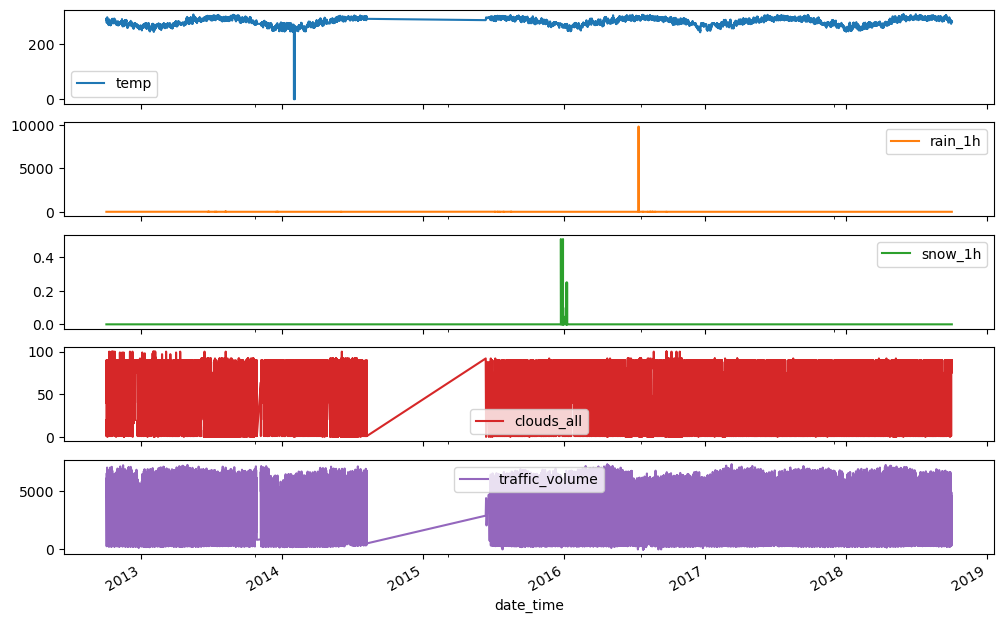

In [143]:
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2013-10-01 21:00:00,285.52,0.00,0.0,0,2670
2013-10-01 23:00:00,282.93,0.00,0.0,0,1299
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
...,...,...,...,...,...
2013-11-30 19:00:00,274.27,0.00,0.0,64,3532
2013-11-30 20:00:00,273.16,0.00,0.0,64,2896
2013-11-30 21:00:00,272.51,0.00,0.0,64,2603


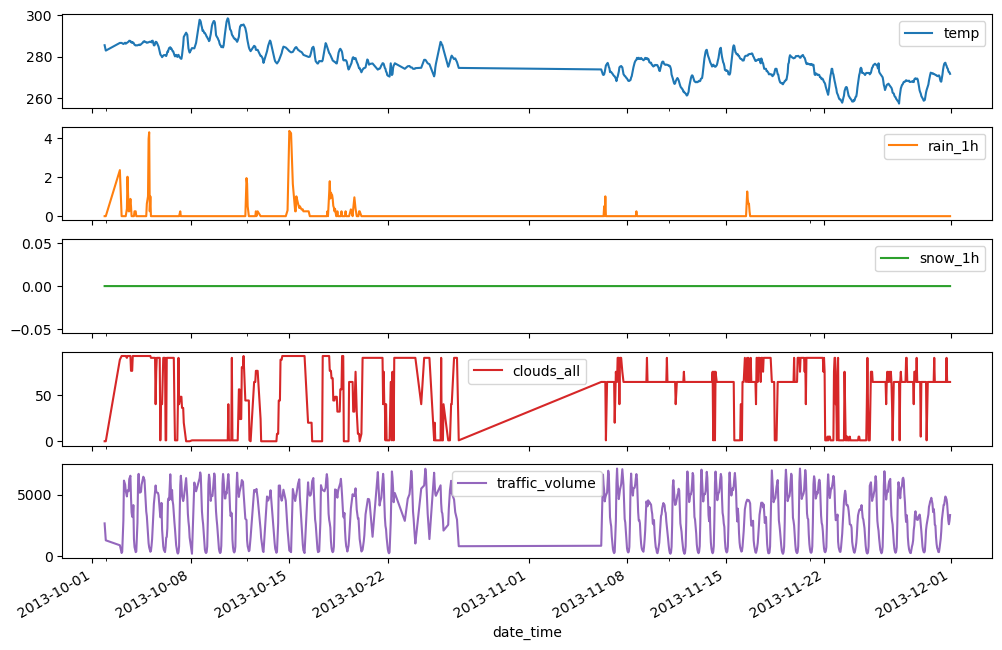

In [144]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

Data is missing records between 2013-10 and 2013-11

and data is missing records between 2014-08-08 and 2015-06-11

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-08-08 00:00:00,NaN,293.450,0.0,0.0,40,Clouds,scattered clouds,848
2014-08-08 01:00:00,NaN,292.380,0.0,0.0,1,Clear,sky is clear,516
2015-06-11 20:00:00,NaN,287.586,0.0,0.0,92,Rain,light rain,2886


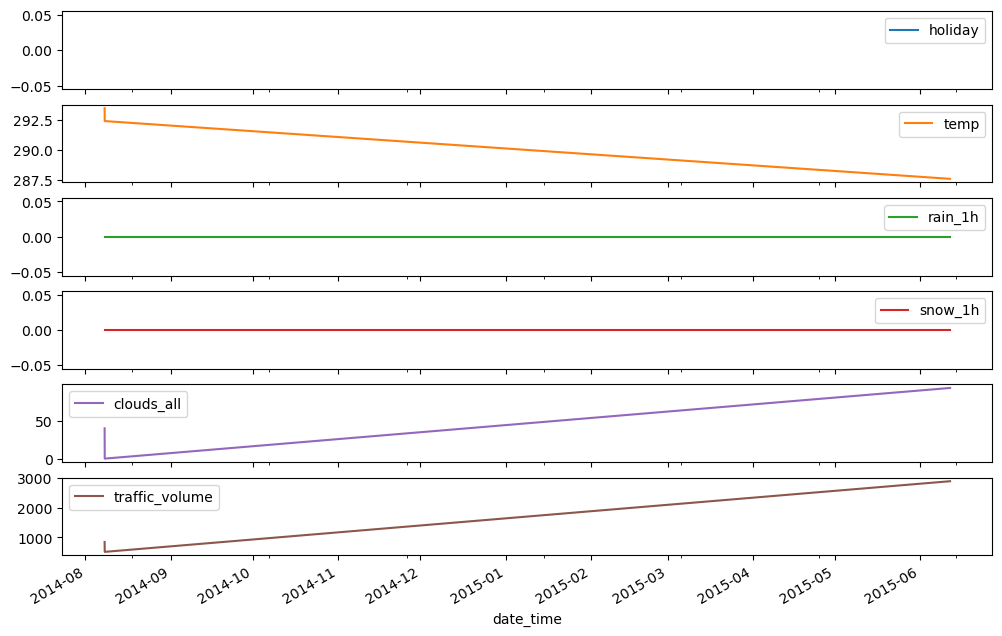

In [146]:
plot_features = df_raw['2014-08-08':'2015-06-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

### Inspect and cleanup

In [148]:
# Check if there are any datetime columns in the dataframe
datetime_columns = df_raw.select_dtypes(include=[np.datetime64]).columns

# If there are datetime columns, process them
if datetime_columns.size > 0:
    # Convert datetime columns to numeric (e.g., as timestamps) for inclusion in describe()
    df_raw[datetime_columns] = df_raw[datetime_columns].apply(pd.to_numeric)

    # Describe the entire DataFrame including the datetime columns now as numeric
    df_description = df_raw.describe().transpose()

    # If needed, separately describe datetime columns
    datetime_description = df_raw[datetime_columns].describe().transpose()

    # Combine both descriptions if necessary
    final_description = pd.concat([df_description, datetime_description], axis=1)
else:
    # If no datetime columns exist, just describe the numeric columns
    df_description = df_raw.describe().transpose()
    final_description = df_description

print(final_description)

                  count         mean          std  min      25%      50%  \
temp            48204.0   281.205870    13.338232  0.0   272.16   282.45   
rain_1h         48204.0     0.334264    44.789133  0.0     0.00     0.00   
snow_1h         48204.0     0.000222     0.008168  0.0     0.00     0.00   
clouds_all      48204.0    49.362231    39.015750  0.0     1.00    64.00   
traffic_volume  48204.0  3259.818355  1986.860670  0.0  1193.00  3380.00   

                     75%      max  
temp             291.806   310.07  
rain_1h            0.000  9831.30  
snow_1h            0.000     0.51  
clouds_all        90.000   100.00  
traffic_volume  4933.000  7280.00  


In [149]:
df_raw.describe(include='object').transpose()

,count,unique,top,freq
holiday,61,11,Labor Day,7
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665


### Univariate Analysis

<Axes: xlabel='count', ylabel='holiday'>

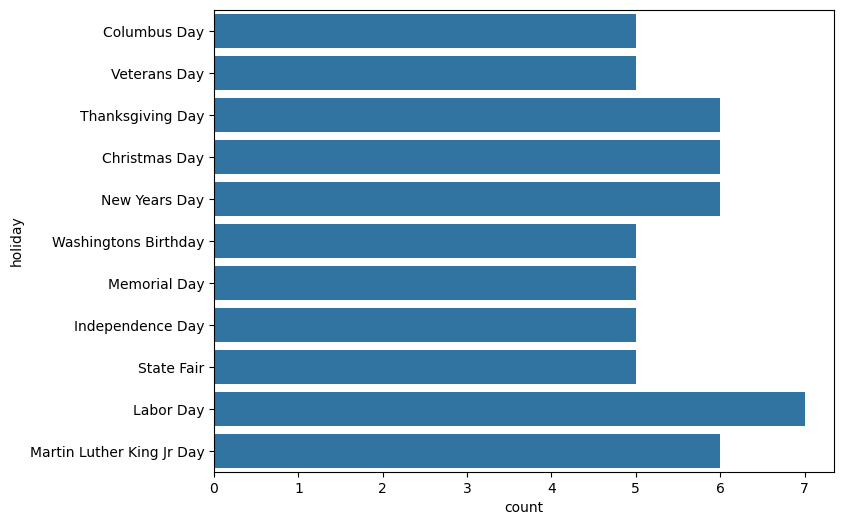

In [204]:
df_holiday_clean = df_raw[df_raw['holiday'].notna()].copy()
plt.figure(figsize=(8, 6))
sns.countplot(y='holiday', data=df_holiday_clean)

Let's see the distribution without the None values

<Axes: xlabel='count', ylabel='holiday'>

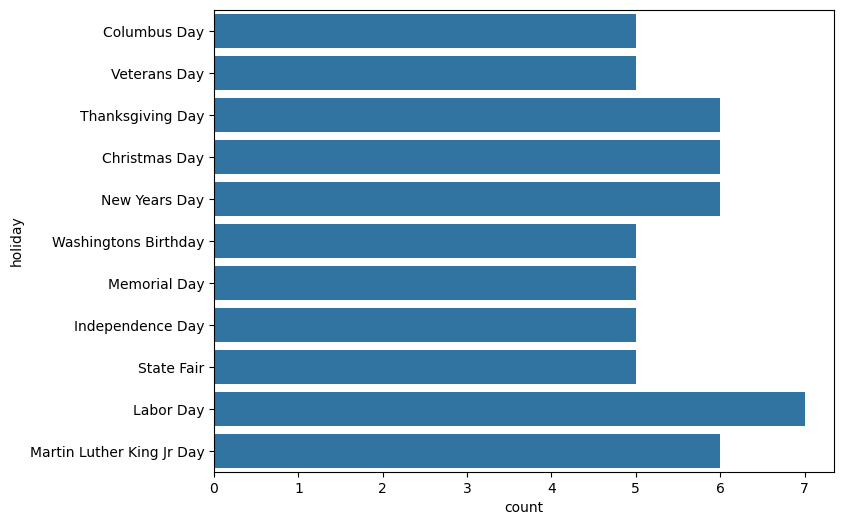

In [206]:
holidays = df_raw[df_raw['holiday'].notna()].copy()
holidays = holidays[holidays['holiday'] != 'None']
plt.figure(figsize=(8, 6))
sns.countplot(y='holiday', data=holidays)

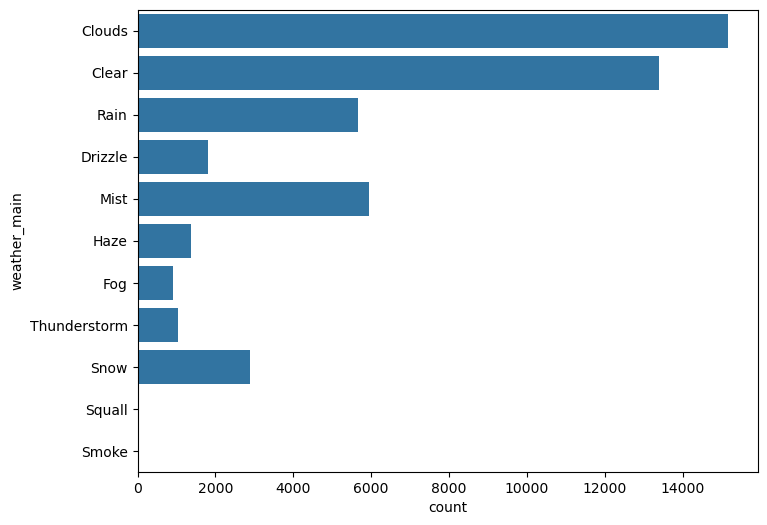

In [176]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw)
plt.show()

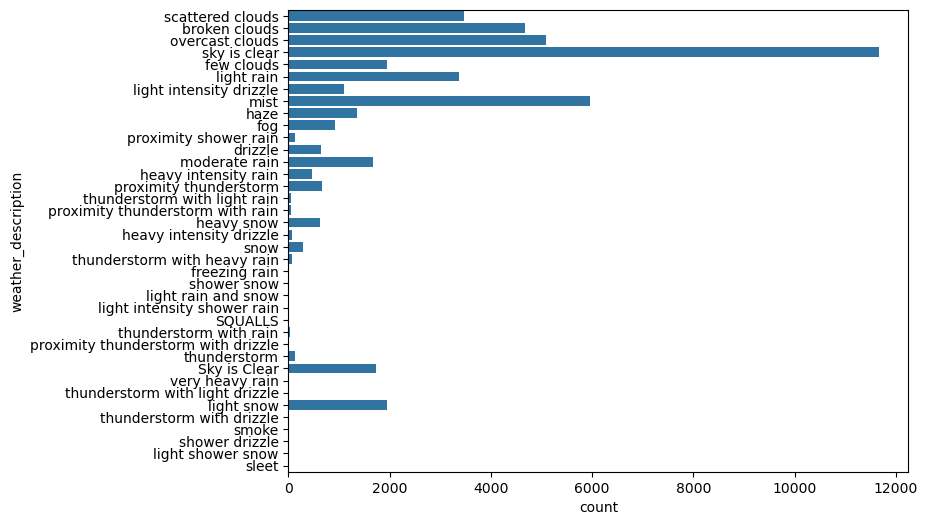

In [178]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw)
plt.show()

### checking outliers

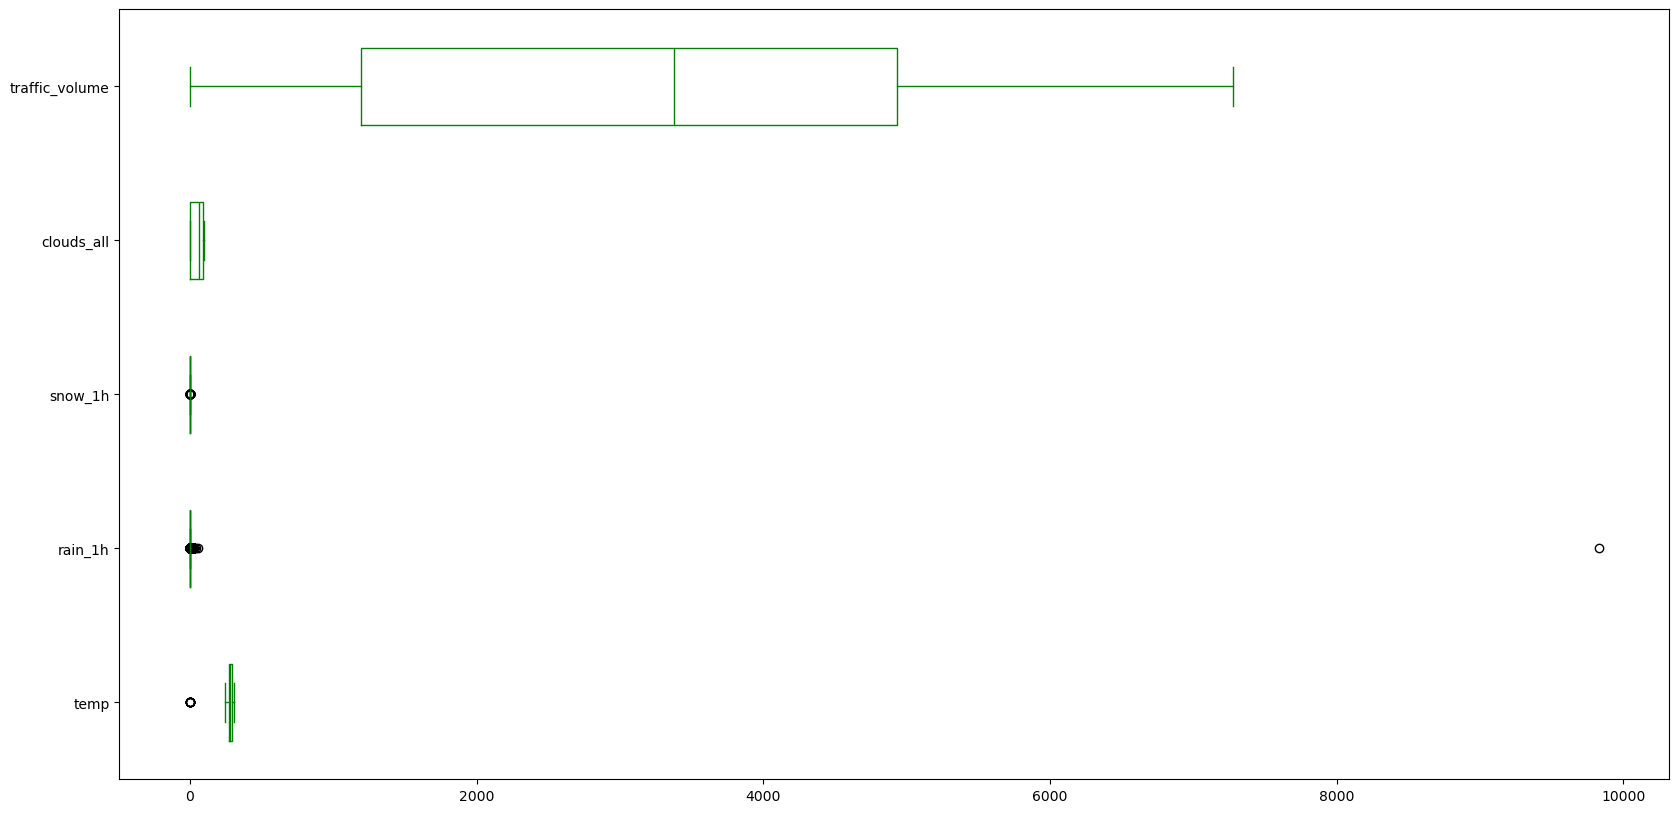

In [180]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

--- 
The following observations were made that we need to take care of:

1. There is no missing data, but that does not mean that there is no inconsistent data.

2. There are temperature records at absolute zero, clearly inconsistent data.

3. rain_1h and snow_1h have many zeros and their distribution is not very well defined, since in rare moments they have high records.

5. Data is missing records between 2013-10 and 2013-11 and data is missing records between 2014-08-08 and 2015-06-11

4. 99.9% of Holiday data is None, and the other data is spread over multiple holidays
---

### Temperature

Temerature values of 0 seem to be erronoes so we will replace with the mean value of the day. We observe 2 days having erronous values [2014-01-31, 2014-02-02]

In [170]:
df_raw[df_raw.temp == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,962


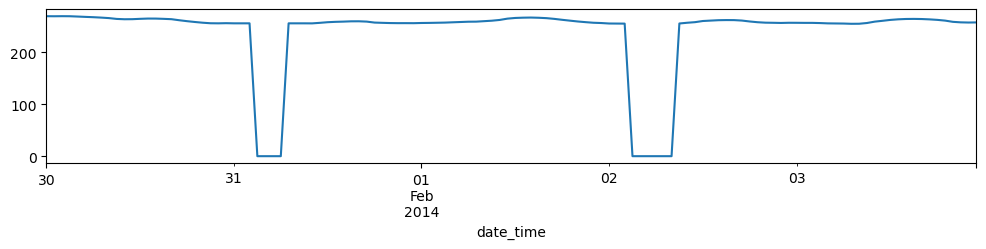

In [172]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [208]:
df_raw.loc['2014-01-31']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,5269


In [210]:
df_raw.loc['2014-02-02']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 00:00:00,NaN,255.59,0.0,0.0,0,Clear,sky is clear,1143
2014-02-02 01:00:00,NaN,255.48,0.0,0.0,0,Clear,sky is clear,695
2014-02-02 02:00:00,NaN,255.37,0.0,0.0,0,Clear,sky is clear,539
2014-02-02 03:00:00,NaN,0.00,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,0.00,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,0.00,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,0.00,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,0.00,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,0.00,0.0,0.0,0,Clear,sky is clear,1670


In [186]:
day_1 = df_raw.index.date == datetime.date(2014, 1, 31)
day_2 = df_raw.index.date == datetime.date(2014, 2, 2)
bad_temps = df_raw['temp'] == 0

df_1 = df_raw.copy()
# Set the zeros to NaN to be excluded from the mean
df_1.loc[bad_temps,'temp'] = np.nan 
df_1[bad_temps]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962


In [188]:
# The means to be used for each day
print(df_1[day_1].temp.mean())
print(df_1[day_2].temp.mean())

257.14
258.4327777777778


In [190]:
df_1[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150


In [192]:
df_1[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,1670


Set the bad temp values to the mean of the day that it occured on

In [194]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,5150


In [196]:
# Set day 2 values
df_1.loc[bad_temps & day_2, 'temp'] = df_1[day_2].temp.mean()
df_1.loc[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,1670


In [198]:
df_1.loc[day_1 | day_2] # Check both days after assigning the mean

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,5269


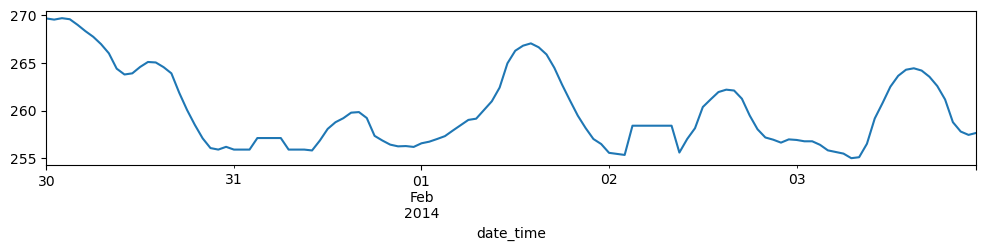

In [212]:
plot_features = df_1['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

### Rain

Rain seems to have only 1 record with extreme value, I'll just set to the general mean value of rain.

In [218]:
df_1[df_1.rain_1h > 100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2016-07-11 17:00:00,NaN,302.11,9831.3,0.0,75,Rain,very heavy rain,5535


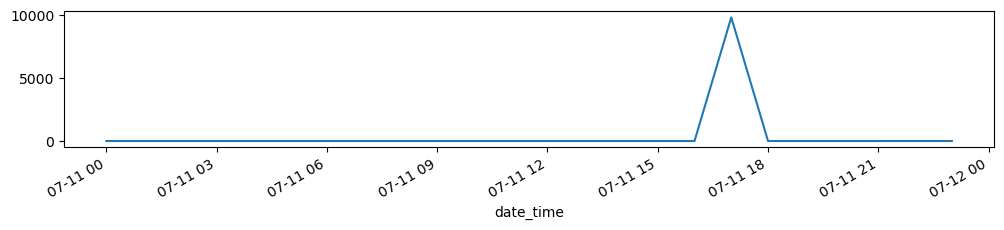

In [224]:
plot_features = df_1.loc['2016-07-11', 'rain_1h']
_ = plot_features.plot(figsize=(12,2))

In [230]:
df_2 = df_1.copy()
df_2.loc['2016-07-11 17:00:00','rain_1h'] = np.nan
df_2.loc['2016-07-11 17:00:00','rain_1h'] = df_2.rain_1h.mean()

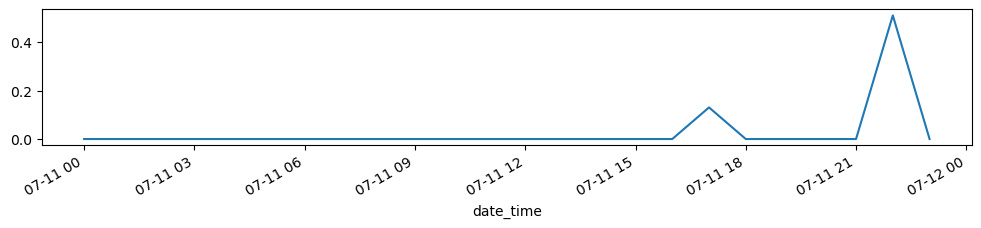

In [232]:
plot_features = df_2.loc['2016-07-11', 'rain_1h']
_ = plot_features.plot(figsize=(12,2))

### Snow

I cannot determine if the snow has outliers or not, it seems to be an exceptional winter. I'll keep as is.

In [234]:
df_2[(df_2.snow_1h > .2)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Rain,moderate rain,5167
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Snow,snow,5167
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Mist,mist,5167
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Fog,fog,5167
2015-12-23 14:00:00,NaN,273.74,0.00,0.32,90,Snow,light snow,5182
2015-12-23 14:00:00,NaN,273.74,0.00,0.32,90,Mist,mist,5182
2015-12-23 14:00:00,NaN,273.74,0.00,0.32,90,Rain,moderate rain,5182
2015-12-23 16:00:00,NaN,273.86,0.00,0.32,90,Snow,light snow,5222
2015-12-23 16:00:00,NaN,273.86,0.00,0.32,90,Mist,mist,5222


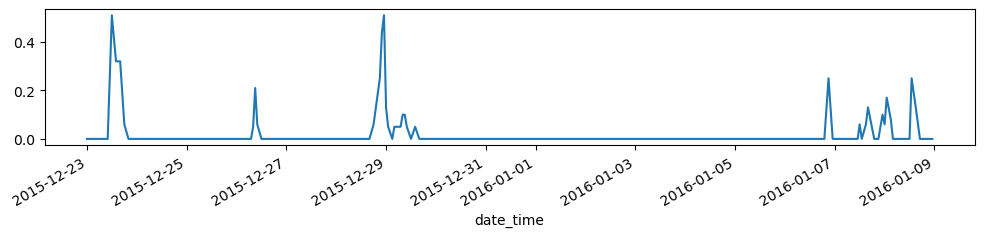

In [236]:
plot_features = df_2['2015-12-23':'2016-01-08'].snow_1h
_ = plot_features.plot(figsize=(12,2))

### Cleaned Data Overview

The data overview looks better now, but still I'm concerned with the missing data block between years 2014 and 2015.

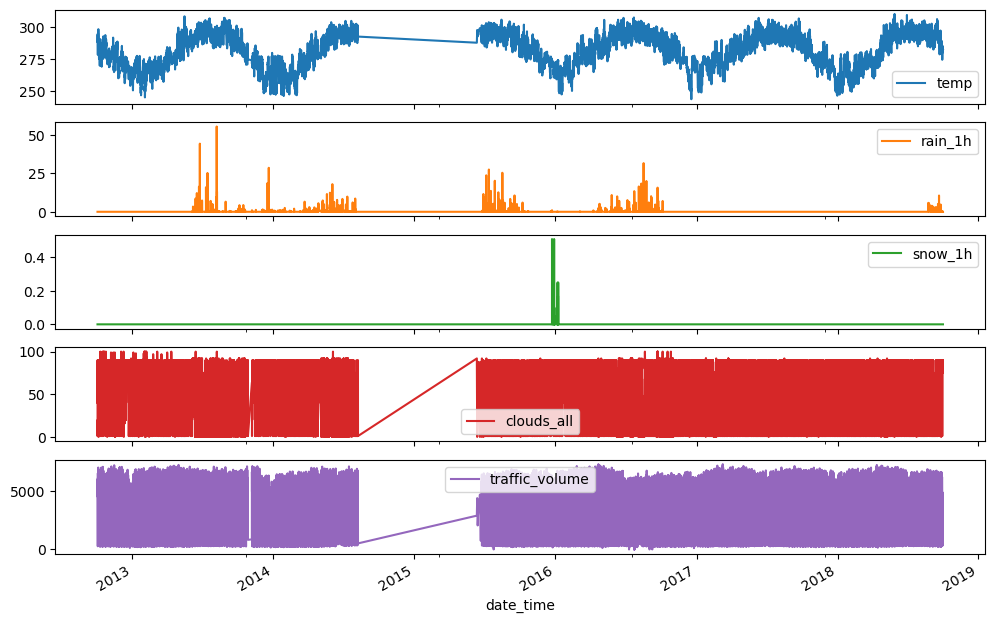

In [238]:
plot_features = df_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

### Feature engineering

**Weather_main and Weather description**  

I decided to transform the weather_main into one-hot encoded variables, and to drop the weather_description as I see that it adds kind of redundant information with weather_main.

In [241]:
df_3 = df_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


In [242]:
df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               61 non-null     object 
 1   temp                  48204 non-null  float64
 2   rain_1h               48204 non-null  float64
 3   snow_1h               48204 non-null  float64
 4   clouds_all            48204 non-null  int64  
 5   traffic_volume        48204 non-null  int64  
 6   weather_Clear         48204 non-null  bool   
 7   weather_Clouds        48204 non-null  bool   
 8   weather_Drizzle       48204 non-null  bool   
 9   weather_Fog           48204 non-null  bool   
 10  weather_Haze          48204 non-null  bool   
 11  weather_Mist          48204 non-null  bool   
 12  weather_Rain          48204 non-null  bool   
 13  weather_Smoke         48204 non-null  bool   
 14  weather_Snow          48204 non-nul

### Holidays and Weekends

I think the valuable information to capture is wether the day is a holiday or a weekend. We don't need to keep track which holiday. So, we will create a new feature is_holiday and drop the old feature holiday. We don't need to keep track which weekend it is. So, we will create a new feature is_weekend.

In [248]:
df_4 = df_3.copy()
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  bool   
 6   weather_Clouds        48204 non-null  bool   
 7   weather_Drizzle       48204 non-null  bool   
 8   weather_Fog           48204 non-null  bool   
 9   weather_Haze          48204 non-null  bool   
 10  weather_Mist          48204 non-null  bool   
 11  weather_Rain          48204 non-null  bool   
 12  weather_Smoke         48204 non-null  bool   
 13  weather_Snow          48204 non-null  bool   
 14  weather_Squall        48204 non-nul

In [250]:
# Check sample values that are expected NOT TO BE a holiday
df_4[df_4.is_holiday == 0].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,


In [252]:
# Check sample values that are expected TO BE a holiday
df_4[df_4.is_holiday == 1].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,False,False,False,False,False,False,1


In [254]:
df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int64', name='date_time', length=48204)

In [256]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  bool   
 6   weather_Clouds        48204 non-null  bool   
 7   weather_Drizzle       48204 non-null  bool   
 8   weather_Fog           48204 non-null  bool   
 9   weather_Haze          48204 non-null  bool   
 10  weather_Mist          48204 non-null  bool   
 11  weather_Rain          48204 non-null  bool   
 12  weather_Smoke         48204 non-null  bool   
 13  weather_Snow          48204 non-null  bool   
 14  weather_Squall        48204 non-nul

In [258]:
# Check sample values that are expected NOT TO BE a weekend
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date_time', length=34501)

In [260]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_time', length=13703)

### Time

Similarly the Date Time column is very useful, but not in this form. We converting it to seconds:

In [264]:
timestamp_s = df_4.index.map(datetime.datetime.timestamp)

My assumption is that the traffic flow is seasonal and periodic based on daily and yearly periodicity.

A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals:

In [267]:
day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_4['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_4['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_4['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_4

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,...,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday,is_weekend,Day sin,Day cos,Year sin,Year cos
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,...,False,False,False,False,1,0,1.000000,8.867710e-12,-0.999810,0.019492
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,...,False,False,False,False,1,0,0.965926,-2.588190e-01,-0.999796,0.020208
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,...,False,False,False,False,1,0,0.866025,-5.000000e-01,-0.999781,0.020925
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,...,False,False,False,False,1,0,0.707107,-7.071068e-01,-0.999766,0.021642
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,...,False,False,False,False,1,0,0.500000,-8.660254e-01,-0.999750,0.022358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,False,True,False,False,False,...,False,False,False,False,1,1,-0.866025,-5.000000e-01,-0.999879,-0.015571
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,False,True,False,False,False,...,False,False,False,False,1,1,-0.965926,-2.588190e-01,-0.999890,-0.014855
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,False,False,False,False,False,...,False,False,False,True,1,1,-1.000000,-5.030593e-12,-0.999900,-0.014138


Text(0.5, 1.0, 'Time of day signal')

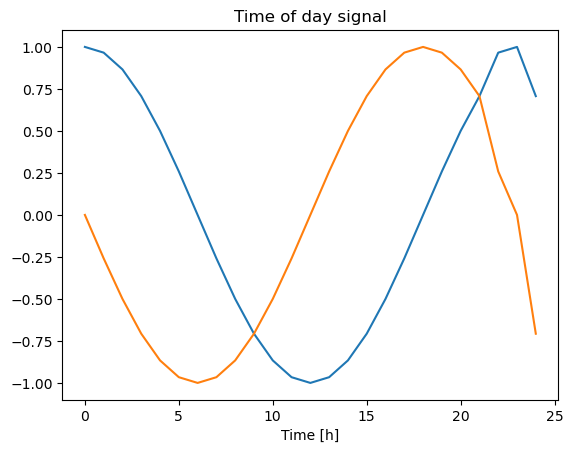

In [269]:
plt.plot(np.array(df_4['Day sin'])[:25])
plt.plot(np.array(df_4['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

If you didn't know, you can determine which frequencies are important using an fft. To check our assumptions, here is the tf.signal.rfft of the traffic_volume over time. Note the obvious peaks at frequencies near 1/year and 1/day:

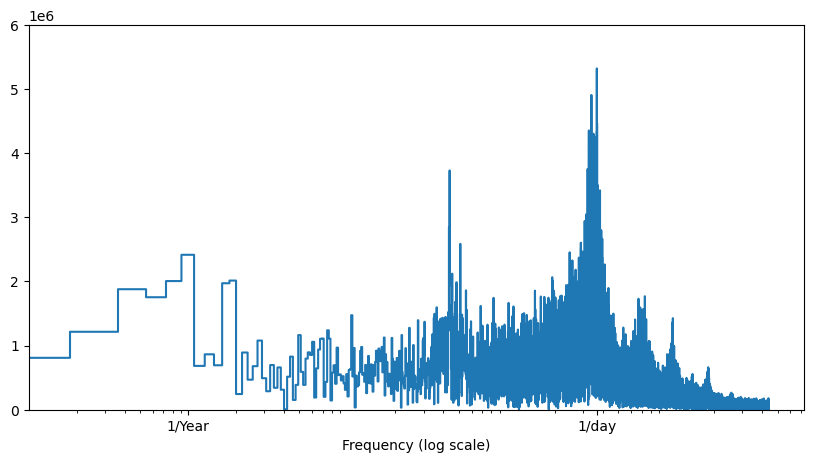

In [272]:
fft = tf.signal.rfft(df_4['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_4['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(10, 5))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 6e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Let's also break down the date_time components into other fields.

In [274]:
df_4['dayofweek'] = df_4.index.dayofweek
df_4['day'] = df_4.index.day
df_4['month'] = df_4.index.month
df_4['year'] = df_4.index.year
df_4['day_hour'] = df_4.index.hour

### Reorder dataframe columns

In [278]:
df_5 = df_4.copy()

Set the traffic_volume to be the first column for ease of use later when we perform predictions

In [281]:
df_5.insert(0, 'traffic_volume', df_5.pop('traffic_volume'))
df_5.insert(1, 'Day sin', df_5.pop('Day sin'))
df_5.insert(2, 'Day cos', df_5.pop('Day cos'))
df_5.insert(3, 'Year sin', df_5.pop('Year sin'))
df_5.insert(4, 'Year cos', df_5.pop('Year cos'))
df_5.insert(5, 'temp', df_5.pop('temp'))
df_5.insert(6, 'clouds_all', df_5.pop('clouds_all'))
df_5.insert(7, 'rain_1h', df_5.pop('rain_1h'))
df_5.insert(8, 'snow_1h', df_5.pop('snow_1h'))
df_5.insert(9, 'is_weekend', df_5.pop('is_weekend'))
df_5.insert(10, 'is_holiday', df_5.pop('is_holiday'))

### Save clean data

In [284]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  weather_Clear         48204 non-null  bool   
 12  weather_Clouds        48204 non-null  bool   
 13  weather_Drizzle       48204 non-null  bool   
 14  weather_Fog           48204 non-nul

In [289]:
df_5.to_csv('E:\\Projects\\Python\\Smart-Traffic-Prediction-LSTM\\metro_interstate_clean.zip',
          compression=dict(method='zip', archive_name='E:\\Projects\\Python\\Smart-Traffic-Prediction-LSTM\\metro_interstate_clean.csv'),
          index=True)

### Prepare for timeseries data processing
Load clean data

In [292]:
df_clean = pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\metro_interstate_clean.zip', parse_dates=['date_time'], index_col='date_time')
df_clean.info()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nomaniqbal\\Desktop\\This Week\\Metro_Interstate_Traffic_Volume\\metro_interstate_clean.zip'

In [ ]:
df_clean.describe().T

Let's check for duplicate hourly entries, these are records having the same date_hour, which is not right as per the expectation of hourly samples.

In [ ]:
df_clean.index.duplicated().sum()

- There 7629 duplicate hourly entries.
- We should fix this by resampling the data to be on 1 hour basis, so that each record resembles only one hour.
- Duplicate hour records will be averaged within the same hour.



### Split the data

The data will not be randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.  
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [ ]:
column_indices = {name: i for i, name in enumerate(df_clean.columns)}
print('Full dataset:\t', df_clean.shape[0])
num_features = df_clean.shape[1]
print('Number of features:', num_features)

In [ ]:
sorted(column_indices.items(), key=lambda x: x[1])

The split distribution without timeseries resampling to 1 hour samples (Has duplicates)

In [ ]:
train_df0 = df_clean[:-15000]
print('train_df:\t', train_df0.shape[0])
val_df0 = df_clean[-15000:-5000]
print('val_df:\t\t', val_df0.shape[0])
test_df0 = df_clean[-5000:]
print('test_df:\t', test_df0.shape[0])

In [ ]:
train_df = df_clean[:-15000].resample('1H').mean().pad()
print('train_df:\t', train_df.shape[0])
val_df = df_clean[-15000:-5000].resample('1H').mean().pad()
print('val_df:\t\t', val_df.shape[0])
test_df = df_clean[-5000:].resample('1H').mean().pad()
print('test_df:\t', test_df.shape[0])

In [ ]:
plot_features = train_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:
plot_features = val_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:
plot_features = test_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

I notice that that the validation data has no rain or snow data point. Not sure how will this affect the Testing predictions.

### Normalize the data
It is important to scale features before training a neural network. I tested the results using both MinMaxScaler and StandardScaler. I got better results with the MinMaxScaler, So I'll be using scikit-learn MinMaxScaler.  

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
my_scaler = MinMaxScaler().fit(train_df)
my_scaler_tv = MinMaxScaler().fit(train_df[['traffic_volume']])
scaled_train_df = pd.DataFrame(my_scaler.transform(train_df), index=train_df.index, columns=train_df.columns)
scaled_val_df = pd.DataFrame(my_scaler.transform(val_df), index=val_df.index, columns=val_df.columns)
scaled_test_df = pd.DataFrame(my_scaler.transform(test_df), index=test_df.index, columns=test_df.columns)

#Let's test the normalizaing and denormalizing scheme

train_df.traffic_volume[0], scaled_train_df.traffic_volume[0], np.float(my_scaler_tv.inverse_transform(scaled_train_df[['traffic_volume']])[0])

In [ ]:
# Single value denormalization
np.float(my_scaler_tv.inverse_transform(np.array([[.7]])))

In [ ]:
df_scaled = scaled_train_df.iloc[:,:11].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Column', y='Normalized', data=df_scaled)


The data is showing rain and snow having alot of outliers. I'm unaware if this is corrupt data or if that's the actual weather in that area.

In [ ]:
# Utility functions
# Special Characters for Output Formating
StartBold = "\033[1m"
EndBold = "\033[0m"

#### WindowGenerator   
I modified the WindowGenerator class to have all the required methods and properties consolidated from the beginging in contrast to the original design of adding the methods and properties at subsequent steps.

In [ ]:
'''
[Code Provided by the tutorial]
The WindowGenerator class.
Start by creating the `WindowGenerator` class. The `__init__` method includes
all the necessary logic for the input and label indices.
It also takes the train, eval, and test dataframes as input.
These will be converted to `tf.data.Dataset`s of windows later.

This class can:

1 - Handle the indexes and offsets as shown in the diagrams above.
2 - Split windows of features into a (features, labels) pairs.
3 - Plot the content of the resulting windows.
4 - Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.
'''
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, batch_size=32,
               train_df=scaled_train_df, val_df=scaled_val_df, test_df=scaled_test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.example = None

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    self.batch_size = batch_size

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size} = {self.input_width}+({self.shift-self.label_width}+{self.label_width})',
        f'Batch size: {self.batch_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices} start: [{self.label_start}]',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    '''
      Given a list consecutive inputs, the split_window method will convert
      them to a window of inputs and a window of labels.
    '''
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    '''
      The plot method that allows a simple visualization of the split window
    '''
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')
    # Maskar: Added this line show that we are only showing n slices
    plt.suptitle(f'Showing only {max_n} slices')

  def make_dataset(self, data):
    '''
      Make_dataset method will take a time series DataFrame and convert it to
      a tf.data.Dataset of (input_window, label_window) pairs using the
      preprocessing.timeseries_dataset_from_array function.
    '''
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False, # Maskar: I changed this to False
        batch_size=self.batch_size, # 32,
        )

    ds = ds.map(self.split_window)

    return ds

  # The WindowGenerator object holds training, validation and test data.
  # Add properties for accessing them as tf.data.Datasets using the above make_dataset method.
  # Also add a standard example batch for easy access and plotting:
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  @example.setter
  def example(self, var):
    self._example = var


### plotting

In [ ]:
def plot_train_validation(history, validation_data, metric='mean_absolute_error'):
    '''
    Function to plot the training and validation accuracy progress with epochs for a single model
    '''
    plt.plot(history.history[metric], label='train')  # For TF2
    plt.plot(history.history['val_'+metric], label='valid.')  # For TF2
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.xticks(range(1,len(history.history['loss'])+1,2))
    #plt.ylim([0.5, 1])
    plt.title(f'{len(history.history[metric])} epochs')
    plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # Evaluate the learned model with validation set
    print(f'\n\n{StartBold}Validation Scores:{EndBold}\n')
    _ = history.model.evaluate(validation_data, verbose=2)


In [ ]:
class TrainingPlot(Callback):
    '''
      A keras callback helper function to plot
      the taining/validation plot after each epoch
    '''
    def __init__(self, loss_metric='mean_absolute_error'):
      super().__init__()
      self.loss_metric = loss_metric

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.losses = []
        self.val_losses = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get(self.loss_metric)
        val_loss = logs.get('val_'+self.loss_metric)
                
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(loss)
        self.val_losses.append(val_loss)
        
        # Plots every n-th epoch
        if epoch > 0 and epoch%1==0:
            
            # Clear the previous plot
            IPython.display.clear_output(wait=True)
            #clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            #plt.style.use("seaborn")            
            #plt.figure(figsize=(10,3))
            plt.xlabel('Epoch')
            plt.ylabel(self.loss_metric)
            plt.plot(N, self.losses, label='train')
            plt.plot(N, self.val_losses, label='valid.')
            plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
            val_denorm = np.float(my_scaler_tv.inverse_transform(np.array([[val_loss]])))
            plt.title(f'Last validation value = {val_denorm:.2f}')
            plt.legend(loc='upper right')          
            plt.show()

### Compile and fit

In [ ]:
def compile_and_fit(model, window, patience=5, max_epochs=30,
                    model_label='model', log_dict=None):
    plot_metrics = TrainingPlot()

    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.001, patience=patience, mode='min', verbose=1 )

    #mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True )

    model.compile( optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()] )

    history = model.fit( window.train, epochs=max_epochs, validation_data=window.val, callbacks=[plot_metrics, early_stopping, rlr] )
  
    if log_dict:
        log_dict['my_models'][model_label] = model

        IPython.display.clear_output()

        print(f'\n\n{StartBold}Training vs. Validation:{EndBold}\n')
        plot_train_validation(history, window.val)

        log_dict['multi_val_performance'][model_label] = model.evaluate(window.val, verbose=0)
        log_dict['multi_performance'][model_label] = model.evaluate(window.train, verbose=0)


    predictions = model.predict(window.val)
    evaluate_predictions(val_df.traffic_volume, predictions)  
    return history

### Evaluate predictions

In [ ]:
def evaluate_predictions(y_true, y_pred, plot_start_index=-500):
    print(f'\n\n{StartBold}Predictions Evaluation:{EndBold}\n')
    y_p = np.asarray(my_scaler_tv.inverse_transform(y_pred.reshape(-1,1))).ravel()
    n_predictions = len(y_p)
    y = np.asarray(y_true[-n_predictions:]).ravel()
    print('Predictions:', n_predictions)
    mae = np.float(tf.metrics.mean_absolute_error(y, y_p))
    mae_scaled = np.float(my_scaler_tv.transform(np.array([[mae]])))
    print(f'MAE: {mae:.2f} ({mae_scaled:.4f})')

    plt.subplots(figsize=(15,2))
    plt.plot(y[plot_start_index:], marker='.', label='true')
    plt.plot(y_p[plot_start_index:], marker='.', label='predicted')
    plt.legend()
    plt.show()

### The models
The required window

In [ ]:
INPUT_WIDTH = 6
OUT_STEPS = 1
SHIFT = 2
base_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )

base_window.plot()
base_window

### Baseline Models

In [ ]:
multi_val_performance = {}
multi_performance = {}
my_models = {}

my_log = {
    'multi_val_performance':multi_val_performance,
    'multi_performance':multi_performance,
    'my_models':my_models
    }

I set all the models to converge into a single output value, which is the traffic volume at the 8th day based on 6 days input of the full features.

### Dense
Using only layers.Dense between the input and output gives a decent linear model.

In [ ]:
%%time
model_label = 'Dense'
current_window = base_window

dense_model = tf.keras.Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(dense_model, current_window,
                          model_label=model_label, log_dict=my_log)

### CNN
A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:

In [ ]:
%%time
model_label = 'Conv'
current_window = base_window

CONV_WIDTH = 3
conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(conv_model, current_window,
                          model_label=model_label, log_dict=my_log)

### RNN

In [ ]:
%%time
model_label = 'LSTM'
current_window = base_window

lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    Dense(OUT_STEPS)
])

history = compile_and_fit(lstm_model, current_window,
                          model_label=model_label, log_dict=my_log)

### My Models
I created another Window Gen to experiment with the batch size in my models

In [ ]:
my_window1 = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )
print("my_window1", my_window1)

# I created another WindowGen to experiment with the batch size in my models
my_window2 = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=64
                               )
print("my_window2", my_window2)

### Model 1

In [ ]:
%%time
model_label = 'MyLSTM_1'
current_window = my_window1

my_lstm_model = tf.keras.Sequential([
    LSTM(512, return_sequences=True),
    LSTM(512, return_sequences=False),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(my_lstm_model, current_window,
                          model_label=model_label, log_dict=my_log,
                          )

In [ ]:
my_lstm_model.summary()

### Model 2

In [ ]:
%%time
model_label = 'MyLSTM_2'
current_window = my_window1

forward_layer = LSTM(512, return_sequences=True)
backward_layer = LSTM(512, return_sequences=True, go_backwards=True)
 
my_lstm_model = tf.keras.Sequential([
    Bidirectional(forward_layer, backward_layer=backward_layer),
    Bidirectional(LSTM(512, return_sequences=False, stateful=False)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(my_lstm_model, current_window,
                          model_label=model_label, log_dict=my_log,
                          )

In [ ]:
my_lstm_model.summary()

### Performance comparision

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = my_lstm_model.metrics_names.index(metric_name)
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Train')
plt.xticks(ticks=x, labels=multi_performance.keys(), rotation=45)
plt.ylabel(f'{metric_name} (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')
print()

for name, value in multi_performance.items():
    z = np.float(my_scaler_tv.inverse_transform(np.array([[value[1]]])))
    print(f'{name:8s}: {z:0.4f}')

In [ ]:
final_predictions = my_models['MyLSTM_2'].predict(my_window1.test)
final_predictions

# Test Result and Analysis:

The Metro Interstate Traffic Volume Data Set is a hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays were included for impacts on traffic volume. Our main aim was to build a multi-step RNN with LSTM model that makes a single prediction point of the traffic volume 2 hours into the future, given the previous 6-hour window. This can be demonstrated in (Figure), where the inputs represent the data point for a given 6 hours, and the label is the expected output 2 hours later.

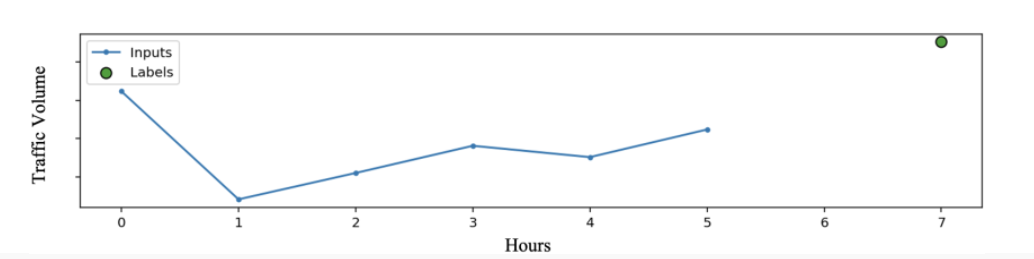

At the initial data processing almost 7629 duplicate hourly entries were found in the dataset, that means the traffic volume was repeated many times for the same day-hour.
Initially, we were aware of that, but we decided to treat the dataset as an hour per record, not as actual time-series set with a time unit indexed dataset, but this led to modest validation results (mid 300s MAE). Then, We decided to preprocess the training and validation dataset properly as timeseries indexed at 1-hour intervals, and the validation results were much better (low 200s MAE).
Lateron, we split the data into training, validation, and testing. To keep track of the records belonging to the right dataset.
Furthermore, during data pre-processing missing data was found between 2014 and 2015 (10 months) and effected validation records because a gap could be clearly observed between the data as shown in the figure below. 

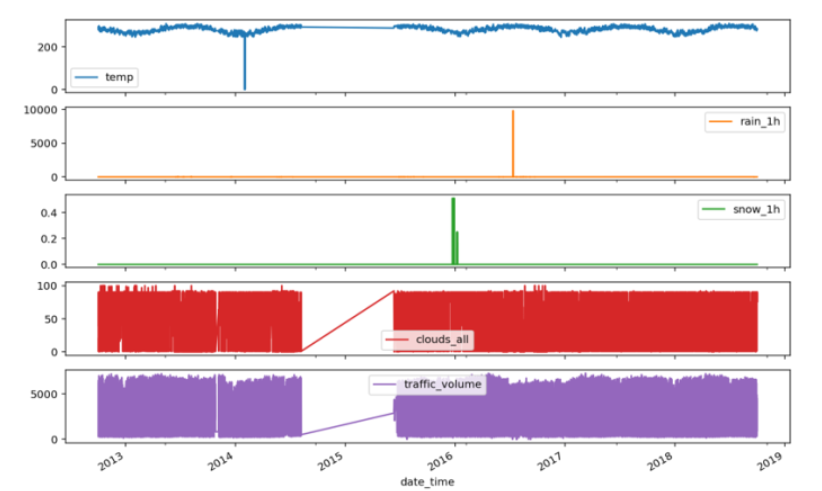

We used neural networks to deal with it and for the outliers that were obsereved in few of the records e.g two days had the temperature field set at zero, which didn't seem right, we fixed it by setting the missing values with the temperature average of each day. 

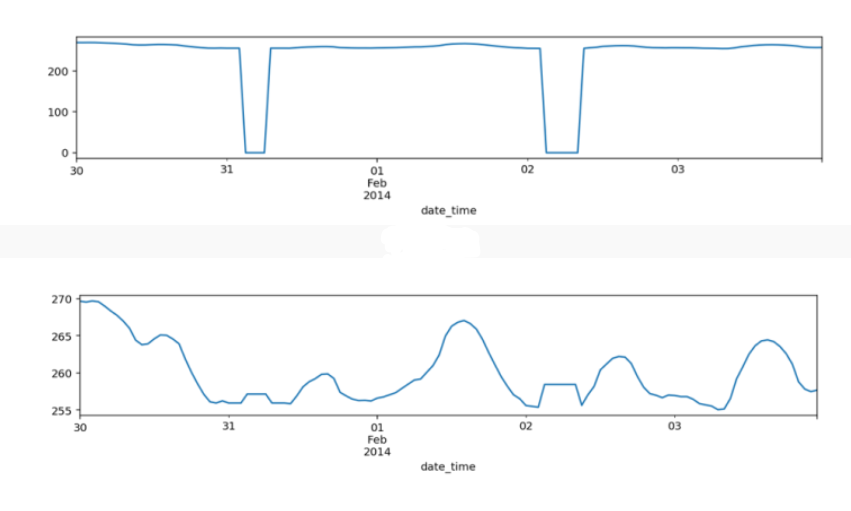

Rain field also had a single extreme value, which we also set to the mean of that day. Snow had extreme values, but we could not determine if the values were to be outliers or not; it could be an exceptional winter, and as we were unaware of the weather conditions in that area, we decided to keep it as is.
Moreover, during feature engineering and data transformation process, we decided to transform the weather_main into one-hot encoded variables and to drop the weather_description as we see that it adds a kind of redundant information with weather_main. Also, we think the valuable information to capture is whether the day is a holiday or a weekend. We don't need to keep track of which holiday. So, a new feature is_holiday is created, and the old feature holiday was dropped. Similarly, we don't need to keep track of which weekend it is. So, we created a new feature, is_weekend. The date_time field was converted into a signal using sin and cos to convert the time to clear "Time of day" and "Time of year" signals. This gives the model access to the most important frequency features.
Lastly, we broke down the date_time components into its other elemental fields, dayofweek, day, month, year, and day_hour.
We end with 27 features instead of the initial 9 features.
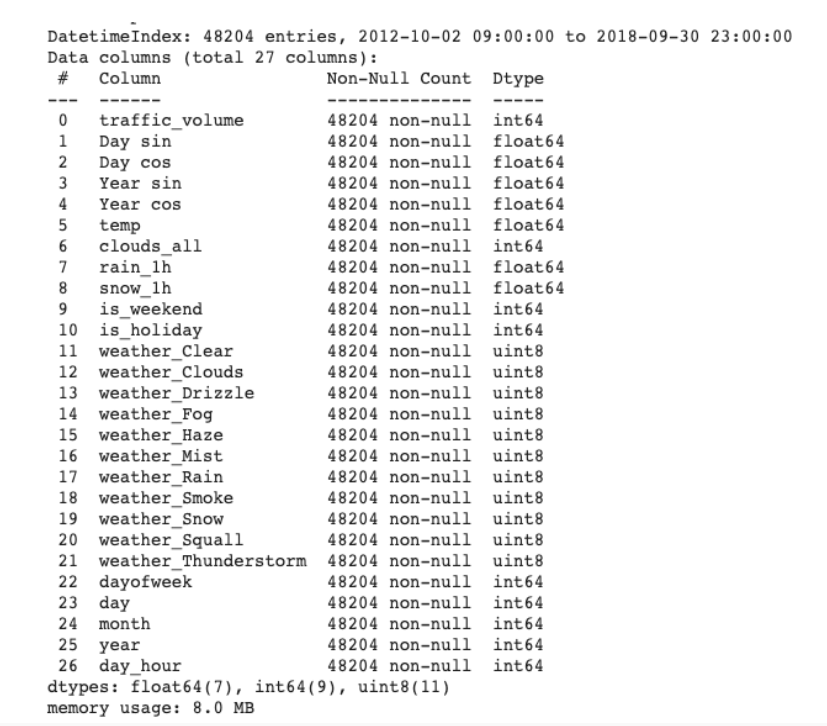

In the time series index resampling section, as mentioned, there were 7629 duplicate hourly entries. And we decided to fix this by resampling the data to be on a 1-hour basis so that each record resembles only one hour. Duplicate hour records were averaged within the same hour. The transformations were done after the dataset split into training, validation, and testing.
We got the best results using Min-Max Normalization vs. Standard Scaling. For most of the experiment, we aimed to evaluate the effect of tweaking each hyperparameter individually on the performance of the RNN and LSTM based models. We decided not to use automated hyperparameter search methods to understand better how each hyperparameter affects the model.
Given that the data preprocessing consumed many hours, we had to apply quick and dirty methods to help us understand how the LSTM networks worked. Alternative to the hybrid automated systematic hyperparameters evaluation we applied systematic manual testing of the hyperparameters using extremely small and large values for the number of LSTM units. Then, we added other layer types such as Convolutional, Dense, GRU, and Bi-directional layers. We also experimented with different batch sizes. Then, we started mixing and matching my observations based on how the layers and the hyperparameters affected the
models.
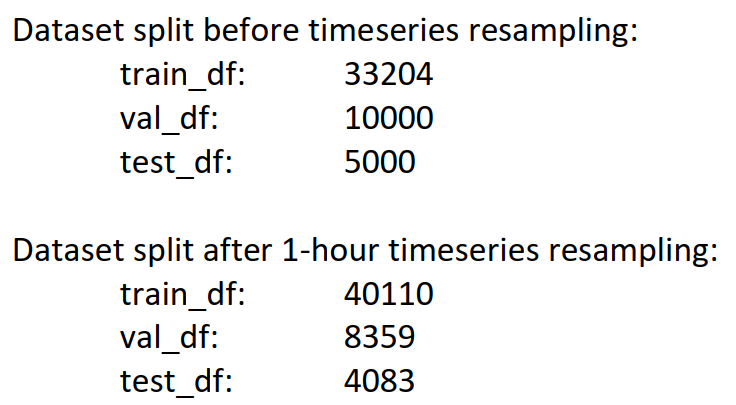

We tried to find well-known LSTM model architectures as we previously found for the Convolutional Neural Networks. Still, we couldn't find anything beyond a couple of LSTM layers as references.
The hyperparameters that were systematically tested using various values are:  
• Number of LSTM units and layers, and Dense units at the final layers (Model 1)  
• Bi-Directional LSTM (Model 2) – 
Furthermore, we kept a variation of three reference models provided in the TensorFlow tutorial (Dense, Conv, and LSTM). We built two other models (MyLSTM_1, MyLSTM_2) that performed better than the reference models.
Our best model utilized bidirectional LSTMs with two custom forward and backward layers, and two dense layers with 512 units each, and a dense output layer with a single unit. The model performed the best and maintained low variance for more epochs during training (Figure).
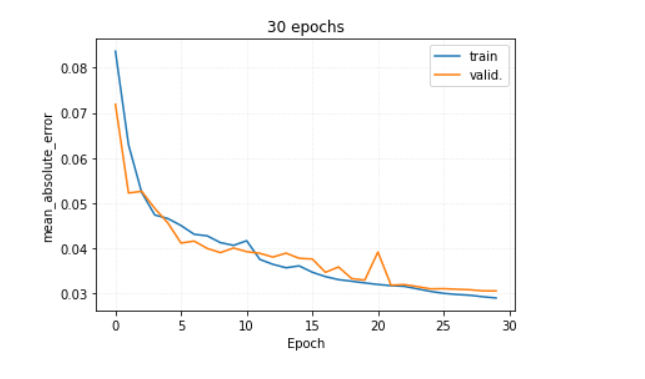

The predictions in (Figure) show that the model captured all the significant patterns with minor misses of some anomalies. 
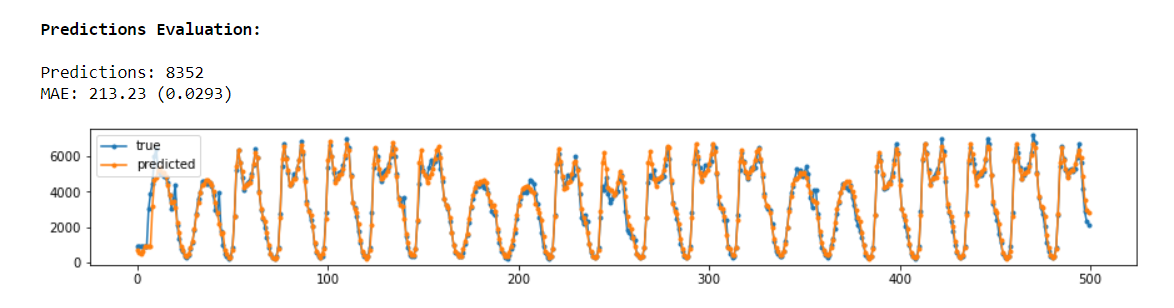

# Conclusion:

• The LSTM Bi-Directional model performed the best with the least variance.  
• We could not make LSTM networks gain better results by going deeper but having more LSTM units made a difference.  
• LSTM and GRU should help with the Vanishing Gradient Descent problem in deep networks, but We did not gain any benefits in building deeper networks. Maybe I was not patient enough this time.  
• We noticed that most of the models with fewer LSTM units were hardly overfitting and showed better validation scores than the training score.   

# References:

1.	A Research of Traffic Prediction using Deep Learning Techniques. International Journal of Innovative Technology and Exploring Engineering, 2019. 8(9S2): p. 725-728.

2.	Apurv Chandel, S.S., Badavath Uday Kiran, Prabhas Prasad, Nidhi Lal, An Accurate Estimation of Interstate Traffic of Metro City Using Linear Regression Model of Machine Learning.

3. Data set. Available from: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#.

4. Ahmad, U.K. Metro Interstate Traffic Volume Time-series Forecasting Using Recurrent for Neural Networks (RNNs). Available from: https://medium.com/@umaimakhurshidahmad/metro-interstate-traffic-volume-time-series-forecasting-using-recurrent-for-neural-networks-rnns-a73732276d1a.

5. Garlan, E.; Available from: https://www.kaggle.com/code/ramyahr/metro-interstate-traffic-volume/notebook.

6. Rohit Singh, A., Mr. Sibi Amaran, Dr. K Sree Kumar, Analysis of traffic flow in different weather conditions. april, 2021.

7. Jiang, R., et al., DL-Traff: Survey and Benchmark of Deep Learning Models for Urban Traffic Prediction, in Proceedings of the 30th ACM International Conference on Information & Knowledge Management. 2021. p. 4515-4525.

8. Kanokwan Khiewwan, P.W., Khumphicha Tantisontisom, and J. Ongate, Application of Data Mining Techniques for Classification of Traffic